# Exploratory data analysis ahead of the first milestone

In [1]:
import pandas as pd
print("pandas: {}".format(pd.__version__))

import matplotlib.pyplot as plt

pandas: 1.3.2


**Reading the files**

The scraping tools gave .csv files, which were manually fixed in around a dozen cases when the scraping tool included whitespace items in the titles. These files were also saved as .xlsx files and the notebook could open them without any errors this way.

memes_1.xlsx and memes_2.xlsx include the IDs, descriptions and upvotes of the scraped memes on two computers. memes_1.xlsx contains memes between 2011.10.04 and 2018.05.20, memes_2.xlsx contains memes between 2018.10.17 and 2020.12.04.

In [2]:
col_names=['id', 'title', 'body', 'score']
memes = pd.read_csv('./output/memes.csv', sep=';', names=col_names, header=None) #,encoding='unicode_escape')
memes = memes.drop(columns = ['body'])
memes = memes.dropna(subset=['score']).reset_index(drop = True) #Throwing out instances where score value is NA -- only 14 cases like this
memes['score'] = memes['score'].astype('int32')


In [3]:
memes

,id,title,score
0,2011.10.04_0,The helpful comment,1
1,2011.10.05_0,Annoying Facebook girl on Google+,0
2,2011.10.10_0,the most hipster man in the world,0
3,2011.10.10_1,I find this an acomplishment...,1
4,2011.10.12_0,Scumbag Older Brother,22
...,...,...,...
173440,2020.12.04_71,pedro,1
173441,2020.12.04_72,Tough choice,30
173442,2020.12.04_73,WTF started all this?,49
173443,2020.12.04_74,I saw something like this in a post so i decid...,33


**Number of memes scraped**

In [4]:
print(str(len(memes))+" memes between 2011.10.04 and 2020.12.04")

173445 memes between 2011.10.04 and 2020.12.04


**Transforming the concatenated dataset**

In [5]:
memes['date'] = memes['id'].str[:10]
memes['date'] = pd.to_datetime(memes['date'])
memes.head()

,id,title,score,date
0,2011.10.04_0,The helpful comment,1,2011-10-04
1,2011.10.05_0,Annoying Facebook girl on Google+,0,2011-10-05
2,2011.10.10_0,the most hipster man in the world,0,2011-10-10
3,2011.10.10_1,I find this an acomplishment...,1,2011-10-10
4,2011.10.12_0,Scumbag Older Brother,22,2011-10-12


Columns of this dataset:
- **id** - unique identifier of each picture;
- **title** - the title of the picture scraped with the image;
- **score** - the number of upvotes the meme received;
- **date** - the day on which the meme was posted;

**Scatterplot - daily frequency of memes**

As we could see from the plot there are no instances from 2013. Turns out that the Reddit Api generator couldn't scrape any memes from 2013.

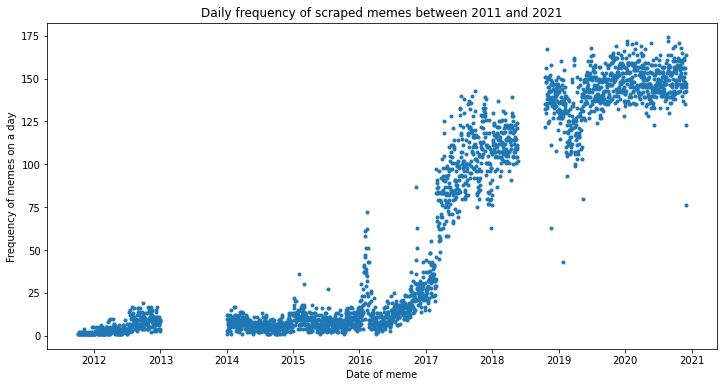

In [6]:
memes['date'].dt.date.value_counts().plot(style='.',figsize=(12, 6))
plt.title('Daily frequency of scraped memes between 2011 and 2021')
plt.xlabel('Date of meme')
plt.ylabel('Frequency of memes on a day')
plt.show()

**Bar chart - yearly frequency of memes**

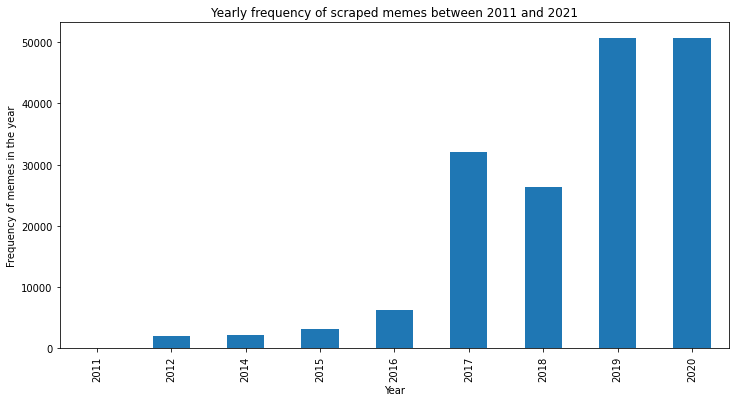

In [7]:
memes['date'].dt.year.value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(12, 6))
plt.title('Yearly frequency of scraped memes between 2011 and 2021')
plt.xlabel('Year')
plt.ylabel('Frequency of memes in the year')
plt.show()

**The ten most popular meme from the ten year scraping interval**

Notice how nine of them is from 2020, only one from 2019, none from earlier.

In [8]:
memes.sort_values('score', ascending=False).head(10)

,id,title,score,date
155014,2020.08.03_109,Can we please just let this meme die already?,147454,2020-08-03
170981,2020.11.17_136,More like physics but whatever.,140155,2020-11-17
141698,2020.05.05_13,It is quite the big sad,118953,2020-05-05
172640,2020.11.28_146,"No Karen, Bad Karen",118129,2020-11-28
161389,2020.09.15_106,I love me some Wikipedia full spreads,118126,2020-09-15
155220,2020.08.05_27,Cats Achilles heel are boxes,110136,2020-08-05
163210,2020.09.27_126,Unbelievable,100778,2020-09-27
167106,2020.10.23_95,Hello. My name is Inigo Montoya. Your gas kill...,98782,2020-10-23
103720,2019.08.24_144,Work attire,97263,2019-08-24
152859,2020.07.20_23,It's so nice to see the news like this,95085,2020-07-20


**Analysis of the distribution among upvotes**

*Analyzing different thresholds (how many memes have more than 100k, 10k etc. upvotes)*

In [9]:
for i in reversed(range(6)):
    print('{} memes have more than {} upvotes, {:.2f}% of the dataset.'.format(sum(memes['score']>10**i),10**i,
                                                                    sum(memes['score']>10**i)/len(memes)*100))

7 memes have more than 100000 upvotes, 0.00% of the dataset.
2110 memes have more than 10000 upvotes, 1.22% of the dataset.
8123 memes have more than 1000 upvotes, 4.68% of the dataset.
25379 memes have more than 100 upvotes, 14.63% of the dataset.
105029 memes have more than 10 upvotes, 60.55% of the dataset.
120424 memes have more than 1 upvotes, 69.43% of the dataset.


*Analyzing different percentiles*

In [10]:
for p in [0.99, 0.95, 0.9, 0.75]:
    print("The {:.0f}th percentile of the upvotes is at {:.0f}.".format(p*100,memes['score'].quantile(p)))

The 99th percentile of the upvotes is at 12036.
The 95th percentile of the upvotes is at 859.
The 90th percentile of the upvotes is at 191.
The 75th percentile of the upvotes is at 55.


**Scatterplot - upvotes of memes**

*First on linear scale* - not a lot can be read from the early years.

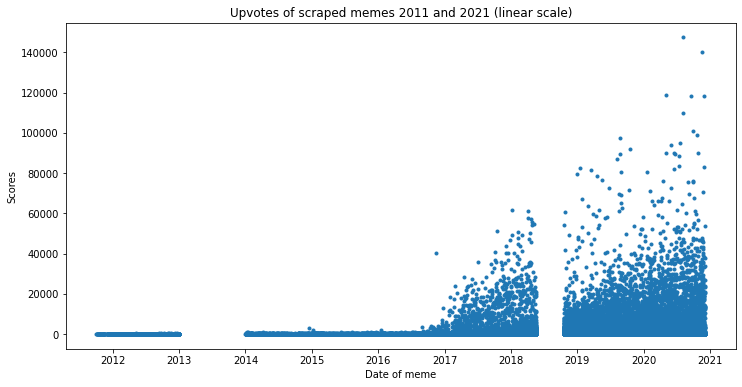

In [11]:
plt.figure(figsize=(12,6))
plt.plot(memes['date'], memes['score'], 'o', markersize=3)
plt.title('Upvotes of scraped memes 2011 and 2021 (linear scale)')
plt.xlabel('Date of meme')
plt.ylabel('Scores')
plt.show()

*Then on logarithmic scale* - notice that memes were able to reach a new magnitude of popularity by 2017, probably because the website (Reddit) was less popular the more we look back in the past.

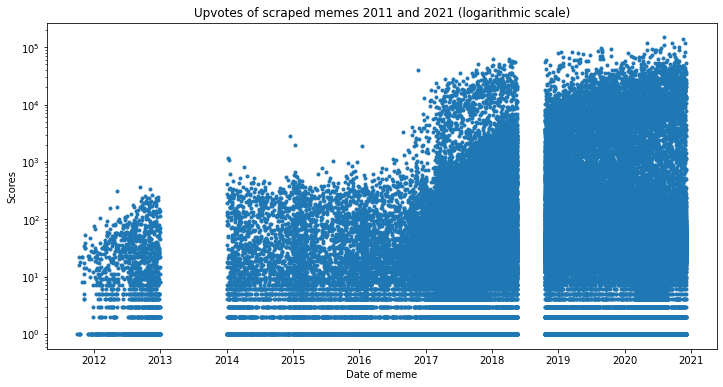

In [12]:
plt.figure(figsize=(12,6))
plt.plot(memes['date'], memes['score'], 'o', markersize=3)
plt.title('Upvotes of scraped memes 2011 and 2021 (logarithmic scale)')
plt.xlabel('Date of meme')
plt.ylabel('Scores')
plt.yscale('log')
plt.show()

**Visualizing all memes by sorting them by upvotes**

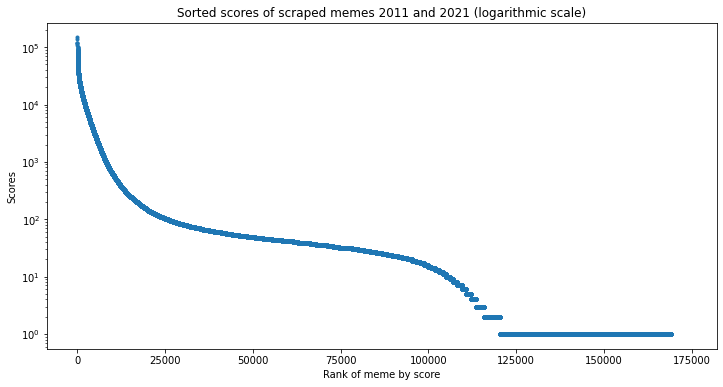

In [13]:
memes['score'].sort_values(ascending=False).reset_index(drop=True).plot(style='.',figsize=(12, 6))
plt.title('Sorted scores of scraped memes 2011 and 2021 (logarithmic scale)')
plt.xlabel('Rank of meme by score')
plt.ylabel('Scores')
plt.yscale('log')
plt.show()

**Preparation for learning - labeling the memes**

In our approach, we consider a meme "popular", "viral" or "dank", if it receives more upvotes than the memes around it. To be exact, we will be looking at the week around the meme (+/- 3 days, as well as the day the meme was posted). If the upvote is in the 95th percentile in that window, the meme will be considered dank.

In [14]:
def window_filter(date, df=memes, before=3, after=3):
    """
    window_filter filters the given dataset, so that it only returns rows in a given date range.
    
    :param date: the central date of the window, it will always be kept in the filtered dataframe
    :param df: the dataset which is being filtered, by default the memes dataset
    :param before: number of days before the date parameter which is kept in the filtered dataframe (3 by default)
    :param after: number of days after the date parameter which is kept in the filtered dataframe (3 by default)
    :return: a data frame which covers rows from a before+after+1 long date range, centered in date
    """
    start = pd.to_datetime(date)-pd.DateOffset(before)
    end = pd.to_datetime(date)+pd.DateOffset(after)
    return df[(df['date'] >= start) & (df['date'] <= end)]

**Create a dataframe where the upvotes and the "dank" threshold can be compared**

Is_Dank is a new binary indicator variable which is 1 if it is popular enough, described above.

In [15]:
data=[]
for index, row in memes.iterrows():
    data.append([row['id'],  row['score'],
                 window_filter(row['date']).quantile(0.95)[0],
                 int(row['score']>window_filter(row['date']).quantile(0.95)[0])])
    
dank = pd.DataFrame(data, columns=['id', 'score', 'threshold', 'is_dank'])
dank

,id,score,threshold,is_dank
0,2011.10.04_0,1,0.95,1
1,2011.10.05_0,0,0.95,0
2,2011.10.10_0,0,18.85,0
3,2011.10.10_1,1,18.85,0
4,2011.10.12_0,22,20.80,1
...,...,...,...,...
173440,2020.12.04_71,1,432.10,0
173441,2020.12.04_72,30,432.10,0
173442,2020.12.04_73,49,432.10,0
173443,2020.12.04_74,33,432.10,0


**Copying the binary variable to the main dataframe, exporting as .csv**

In [16]:
memes['is_dank'] = dank['is_dank']
memes

,id,title,score,date,is_dank
0,2011.10.04_0,The helpful comment,1,2011-10-04,1
1,2011.10.05_0,Annoying Facebook girl on Google+,0,2011-10-05,0
2,2011.10.10_0,the most hipster man in the world,0,2011-10-10,0
3,2011.10.10_1,I find this an acomplishment...,1,2011-10-10,0
4,2011.10.12_0,Scumbag Older Brother,22,2011-10-12,1
...,...,...,...,...,...
173440,2020.12.04_71,pedro,1,2020-12-04,0
173441,2020.12.04_72,Tough choice,30,2020-12-04,0
173442,2020.12.04_73,WTF started all this?,49,2020-12-04,0
173443,2020.12.04_74,I saw something like this in a post so i decid...,33,2020-12-04,0


In [17]:
print('{} memes are considered "dank" from the dataset, a ratio of {:.2f}%'.format(
    sum(memes['is_dank']),sum(memes['is_dank'])/len(memes)*100))

memes.to_csv('./output/memes_prepared.csv', index = False)

8846 memes are considered "dank" from the dataset, a ratio of 5.10%
